# LOAD LIBRARIES

In [1]:
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
import os
import random
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
# !pip install keras
# !pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# unzip files

In [ ]:
# Mount Google Drive (only if using Google Colab)
# from google.colab import drive
# drive.mount('/content/drive')
# import zipfile
# from tqdm import tqdm
# import os

# zip_file_path = "/content/drive/MyDrive/kaggle/archive(6).zip"
# destination_folder = "/content/drive/MyDrive/kaggle/tutti_definitive_audios/"

# print("Zip file path:", zip_file_path)
# print("Destination folder:", destination_folder)

# if not os.path.exists(destination_folder):
#     os.makedirs(destination_folder)
#     print(f"Destination folder '{destination_folder}' created.")
# else:
#     print(f"Destination folder '{destination_folder}' already exists.")

# try:
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         total_files = len(zip_ref.infolist())

#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         for file_info in tqdm(zip_ref.infolist(), desc="Extracting", unit="file", total=total_files):
#             zip_ref.extract(file_info, destination_folder)

#     print("Unzipped successfully!")

# except Exception as e:
#     print("An error occurred during extraction:", e)

# EXPLORATION OF THE DATASET

In [2]:

dataset = "C:/Users/pc/Desktop/augmented_dataset"
def count(path):
    size=[]
    for file in os.listdir(path):
        size.append(len(os.listdir(os.path.join(path,file))))
    return pd.DataFrame(size,columns=['Number Of Sample'],index=os.listdir(path))  
tr=count(dataset)
tr

,Number Of Sample
bed,1356
bird,1346
cat,1378
dog,1474
down,1188
eight,1113
five,1092
four,2400
go,960
happy,1481


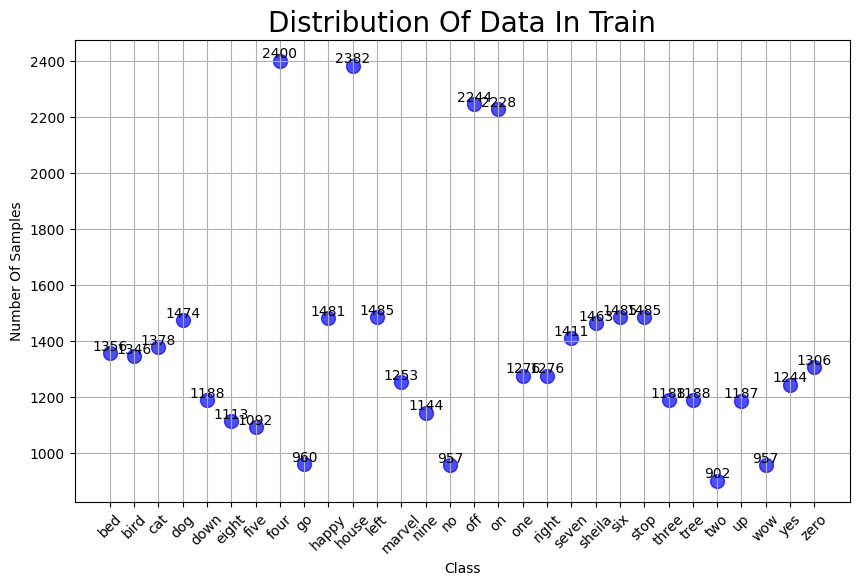

In [3]:


classes = os.listdir(dataset)
samples = tr['Number Of Sample']

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(classes, samples, s=100, c='blue', alpha=0.7)

# Add labels and formatting
ax.set_xlabel('Class')
ax.set_ylabel('Number Of Samples')
ax.set_title('Distribution Of Data In Train', fontsize=20)
ax.tick_params(axis='x', rotation=45)


for i, class_name in enumerate(classes):
    ax.text(class_name, samples[i], str(samples[i]), ha='center', va='bottom')

plt.grid(True)
plt.show()

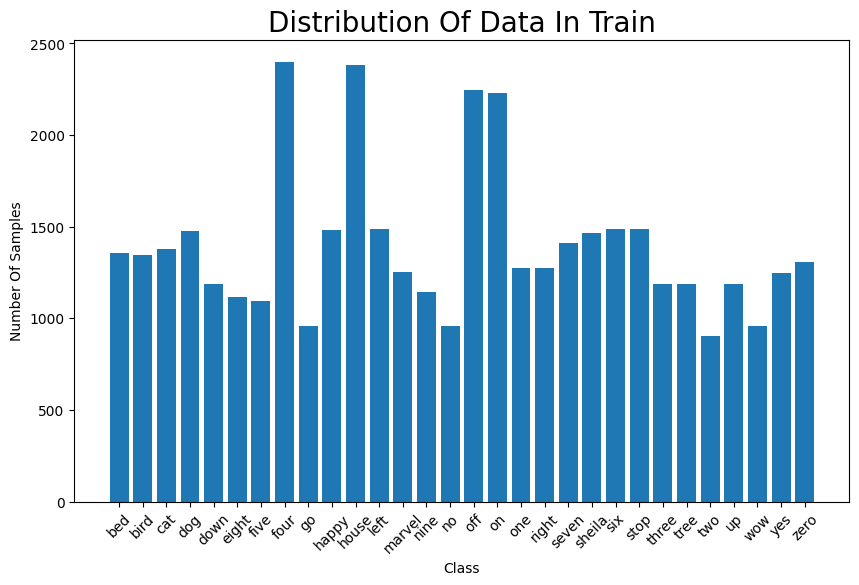

In [4]:



classes = os.listdir(dataset)
samples = tr['Number Of Sample']


fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(classes, samples)

ax.set_xlabel('Class')
ax.set_ylabel('Number Of Samples')
ax.set_title('Distribution Of Data In Train', fontsize=20)
ax.tick_params(axis='x', rotation=45)

plt.show()

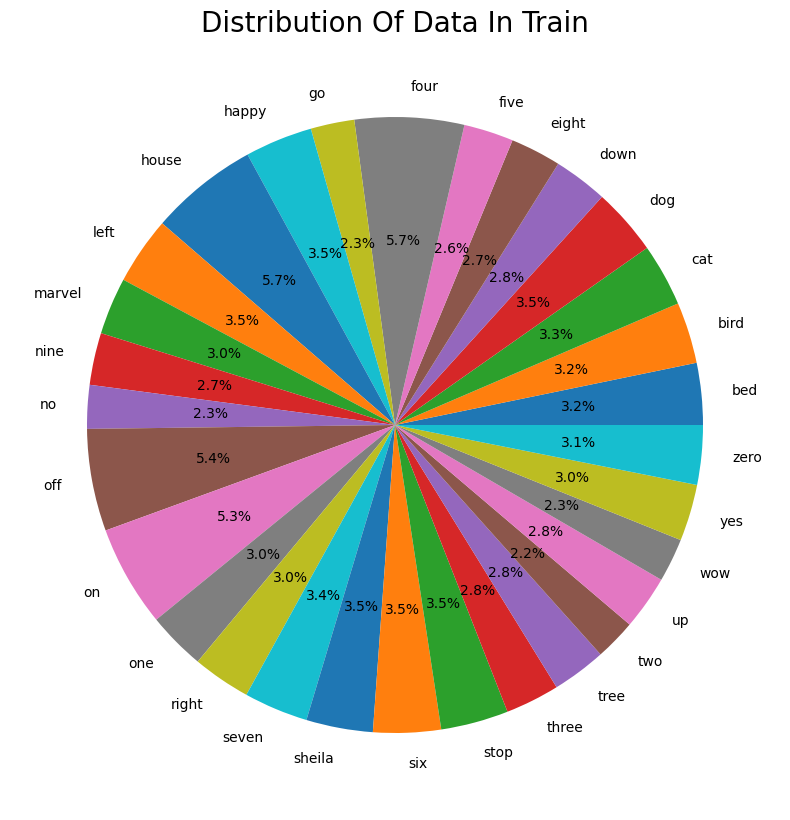

In [5]:




fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(tr['Number Of Sample'], labels=os.listdir(dataset), autopct='%1.1f%%')
ax.set_title('Distribution Of Data In Train', fontsize=20)

plt.show()


# visualize files

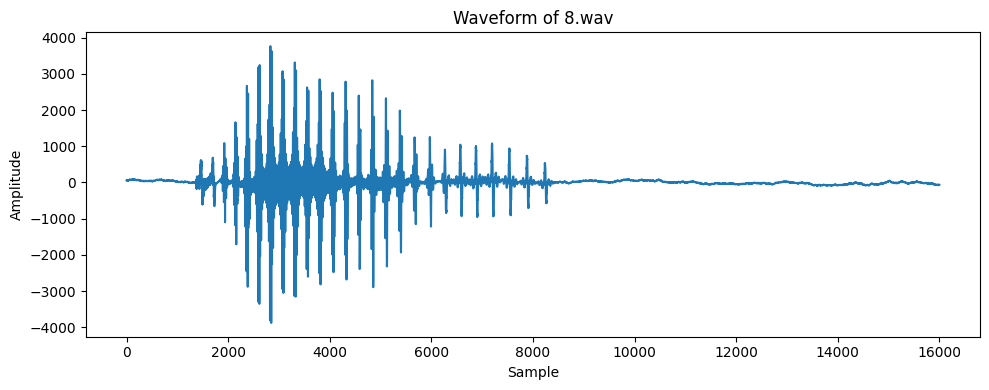

In [6]:

def plot_waveform(audio_file):
    
    samplerate, data = wavfile.read(audio_file)

    
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title(f'Waveform of {os.path.basename(audio_file)}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

audio_file_path = "C:/Users/pc/Desktop/augmented_dataset/down/8.wav"
plot_waveform(audio_file_path)

# LISTEN SOME AUDIOS




In [8]:

ipd.Audio("C:/Users/pc/Desktop/augmented_dataset/four/4.wav")

In [9]:
ipd.Audio("C:/Users/pc/Desktop/augmented_dataset/four/19.wav")

In [10]:
ipd.Audio("C:/Users/pc/Desktop/augmented_dataset/marvel/7.wav")

# Split data

In [11]:

def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    return y


def preprocess_and_split(data_folder, test_size=0.15):
    audio_paths = []
    labels = []

    class_folders = os.listdir(data_folder)
    for class_idx, class_folder in enumerate(class_folders):
        class_path = os.path.join(data_folder, class_folder)
        if os.path.isdir(class_path):
            audio_files = os.listdir(class_path)
            for audio_file in audio_files:
                audio_path = os.path.join(class_path, audio_file)
                audio_paths.append(audio_path)
                labels.append(class_idx)

    X_train, X_temp, y_train, y_temp = train_test_split(audio_paths, labels, test_size=test_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    X_train_processed = [extract_features(audio_file) for audio_file in tqdm(X_train, desc='Processing Training Data')]
    X_val_processed = [extract_features(audio_file) for audio_file in tqdm(X_val, desc='Processing Validation Data')]
    X_test_processed = [extract_features(audio_file) for audio_file in tqdm(X_test, desc='Processing Test Data')]

    X_train_processed = np.array(X_train_processed)
    X_val_processed = np.array(X_val_processed)
    X_test_processed = np.array(X_test_processed)

    X_train_processed = X_train_processed[:, :, np.newaxis]
    X_val_processed = X_val_processed[:, :, np.newaxis]
    X_test_processed = X_test_processed[:, :, np.newaxis]

    return X_train_processed, X_val_processed, X_test_processed, np.array(y_train), np.array(y_val), np.array(y_test)

data_folder = "C:/Users/pc/Desktop/augmented_dataset"
X_train, X_val, X_test, y_train, y_val, y_test = preprocess_and_split(data_folder)

Processing Test Data: 100%|██████████| 3139/3139 [00:05<00:00, 568.91it/s]


# Model

im running the script on my local machine, for this reason ill try just a simple model for some epochs

In [12]:


# Define the model
inputs = layers.Input(shape=X_train[0].shape)

# First Conv1D layer
conv = layers.Conv1D(8, 13, padding='valid', activation='relu', strides=1)(inputs)
conv = layers.MaxPooling1D(3)(conv)
conv = layers.Dropout(0.3)(conv)

# Second Conv1D layer
conv = layers.Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = layers.MaxPooling1D(3)(conv)
conv = layers.Dropout(0.3)(conv)

# Flatten layer
conv = layers.Flatten()(conv)

# Dense Layer 1
conv = layers.Dense(64, activation='relu')(conv)
conv = layers.Dropout(0.3)(conv)

# Dense Layer 2
conv = layers.Dense(len(set(y_train)), activation='softmax')(conv)

model = models.Model(inputs, conv)
model.summary()













early_stop = callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=20, callbacks=[early_stop, model_checkpoint])


model = models.load_model('best_model.h5')

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22050, 1)]        0         
                                                                 
 conv1d (Conv1D)             (None, 22038, 8)          112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7346, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7346, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 7336, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2445, 16)         0         
 1D)                                                         

In [27]:
# Save the model
model.save('my_model.h5')


In [28]:
def predict_audio_class(audio_file_path, model):
   
    audio_data = extract_features(audio_file_path)
    audio_data = audio_data[np.newaxis, :, np.newaxis]  

    
    prediction = model.predict(audio_data)
    predicted_class = np.argmax(prediction)

    return predicted_class


In [29]:

model = tf.keras.models.load_model('my_model.h5')

In [35]:

audio_file_path = 'C:/Users/pc/Desktop/augmented_dataset/four/4.wav'
predicted_class = predict_audio_class(audio_file_path, model)

print(f'The predicted class of the audio file is: {predicted_class}')


1/1 [==============================] - 0s 30ms/step
The predicted class of the audio file is: 7


In [33]:
dataset = "C:/Users/pc/Desktop/augmented_dataset"
def count(path):
    size=[]
    for file in os.listdir(path):
        size.append(len(os.listdir(os.path.join(path,file))))
    return pd.DataFrame(size,columns=['Number Of Sample'],index=os.listdir(path))  
tr=count(dataset)
tr

,Number Of Sample
bed,1356
bird,1346
cat,1378
dog,1474
down,1188
eight,1113
five,1092
four,2400
go,960
happy,1481


# FINAL MODEL VIZ

In [19]:

def print_model_summary(model):
    print(f"{'Layer (type)':<25} {'Output Shape':<25} {'Param #':<15}")
    print("=" * 75)
    for layer in model.layers:
        params = layer.count_params()
        print(f"{layer.name:<25} {str(layer.output_shape):<25} {params:<15}")

    total_params = model.count_params()
    print("=" * 75)
    print(f"Total params: {total_params}\n")

print_model_summary(model)


Layer (type)              Output Shape              Param #        
input_1                   [(None, 22050, 1)]        0              
conv1d                    (None, 22038, 8)          112            
max_pooling1d             (None, 7346, 8)           0              
dropout                   (None, 7346, 8)           0              
conv1d_1                  (None, 7336, 16)          1424           
max_pooling1d_1           (None, 2445, 16)          0              
dropout_1                 (None, 2445, 16)          0              
flatten                   (None, 39120)             0              
dense                     (None, 64)                2503744        
dropout_2                 (None, 64)                0              
dense_1                   (None, 30)                1950           
Total params: 2507230



# EVALUATION

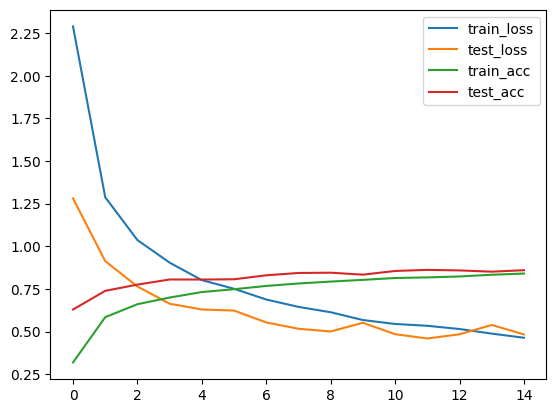

In [14]:
plt.plot(history.history['loss'], label='train_loss') 
plt.plot(history.history['val_loss'], label='test_loss') 
plt.plot(history.history['accuracy'], label='train_acc') 
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend() 
plt.show()

99/99 [==============================] - 5s 39ms/step


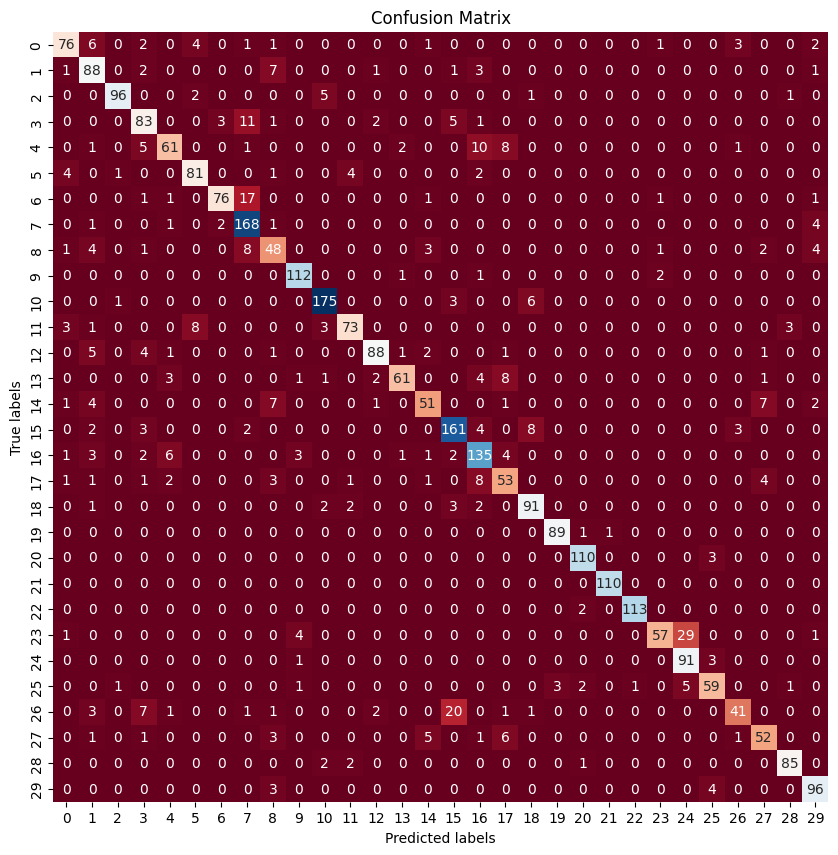

In [23]:
# Assuming you have already defined X_test and y_test

# Use your model to make predictions
preN = model.predict(X_test)
preN = np.argmax(preN, axis=1)  # only needed if your model is multiclass and outputs softmax probabilities

# Create the confusion matrix
CM = confusion_matrix(y_test, preN)

# Display the visualization
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax=ax, cbar=False, cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()


In [26]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming preN and y_test are already defined
ClassificationReport = classification_report(y_test, preN, output_dict=True)

# Convert it to DataFrame
report_df = pd.DataFrame(ClassificationReport).transpose()

print(report_df)


              precision    recall  f1-score      support
0              0.853933  0.783505  0.817204    97.000000
1              0.727273  0.846154  0.782222   104.000000
2              0.969697  0.914286  0.941176   105.000000
3              0.741071  0.783019  0.761468   106.000000
4              0.802632  0.685393  0.739394    89.000000
5              0.852632  0.870968  0.861702    93.000000
6              0.938272  0.775510  0.849162    98.000000
7              0.803828  0.949153  0.870466   177.000000
8              0.623377  0.666667  0.644295    72.000000
9              0.918033  0.965517  0.941176   116.000000
10             0.930851  0.945946  0.938338   185.000000
11             0.890244  0.802198  0.843931    91.000000
12             0.916667  0.846154  0.880000   104.000000
13             0.924242  0.753086  0.829932    81.000000
14             0.784615  0.689189  0.733813    74.000000
15             0.825641  0.879781  0.851852   183.000000
16             0.789474  0.8544